In [ ]:
# Install required packages
!pip install biopython
!pip install pandas numpy matplotlib seaborn
!pip install scikit-learn
!pip install tensorflow keras
!pip install streamlit pyngrok
!pip install shap

# Enable GPU
# Colab -> Runtime -> Change runtime type -> GPU



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 106.2 MB/s eta 0:00:00


In [ ]:
from Bio import Entrez, SeqIO

Entrez.email = "tahirrr402@gmail.com"

# Example: fetch DNA sequence by accession ID
handle = Entrez.efetch(db="nucleotide", id="NM_001301717", rettype="fasta", retmode="text")
record = SeqIO.read(handle, "fasta")
handle.close()

print(f"ID: {record.id}")
print(f"Description: {record.description}")
print(f"Sequence (first 100 bases): {record.seq[:100]}")


ID: NM_001301717.2
Description: NM_001301717.2 Homo sapiens C-C motif chemokine receptor 7 (CCR7), transcript variant 4, mRNA
Sequence (first 100 bases): CTCTAGATGAGTCAGTGGAGGGCGGGTGGAGCGTTGAACCGTGAAGAGTGTGGTTGGGCGTAAACGTGGACTTAAACTCAGGAGCTAAGGGGGAAACCAA


In [ ]:
import numpy as np

def one_hot_encode(seq):
    mapping = {'A':[1,0,0,0], 'T':[0,1,0,0], 'G':[0,0,1,0], 'C':[0,0,0,1]}
    return np.array([mapping.get(base,[0,0,0,0]) for base in seq])

X = one_hot_encode(str(record.seq))
print("Encoded shape:", X.shape)


Encoded shape: (2191, 4)


In [ ]:
from collections import Counter

def kmer_count(seq, k=3):
    return Counter([seq[i:i+k] for i in range(len(seq)-k+1)])

kmer_freq = kmer_count(str(record.seq))
print("Top 10 k-mers:", kmer_freq.most_common(10))


Top 10 k-mers: [('CTC', 68), ('CCT', 64), ('CAG', 63), ('CCA', 62), ('TGG', 59), ('TCC', 59), ('CTG', 55), ('TCA', 54), ('GTG', 54), ('GCT', 53)]


In [ ]:
from sklearn.model_selection import train_test_split

# Example: X = features, y = labels
# X_data and y_data are not defined. Using X (features) from previous cell.
# In a real scenario, you would need to define your labels (y_data) based on your problem.
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (1752, 4)
Shape of X_test: (439, 4)


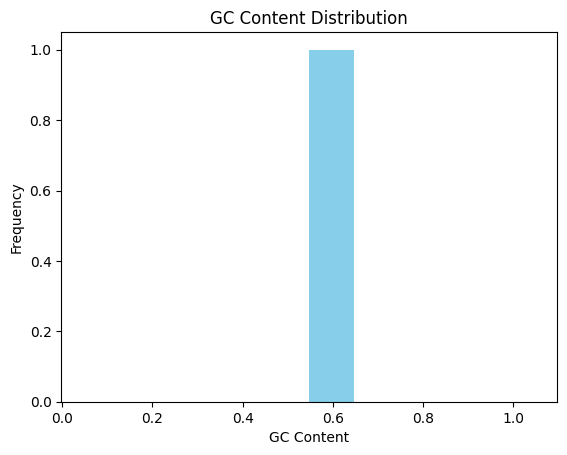

In [ ]:
import matplotlib.pyplot as plt

def gc_content(seq):
    return (seq.count('G') + seq.count('C')) / len(seq)

gc = [gc_content(str(record.seq))]  # For multiple sequences, use a loop

plt.hist(gc, bins=10, color='skyblue')
plt.xlabel("GC Content")
plt.ylabel("Frequency")
plt.title("GC Content Distribution")
plt.show()


GENOMIC DATA ANALYTICS & PATTERN RECOGNITION PIPELINE

[Step 1/9] Installing required dependencies...

⚙ Installing biopython...
✓ biopython installed successfully
✓ pandas already installed
✓ numpy already installed
✓ matplotlib already installed
✓ seaborn already installed
⚙ Installing scikit-learn...
✓ scikit-learn installed successfully
✓ tensorflow already installed
✓ shap already installed
✓ streamlit already installed
✓ pyngrok already installed
✓ plotly already installed

✓ All dependencies installed and imported successfully!

[Step 2/9] Generating Synthetic Genomic Dataset

Creating simulated cancer vs. normal gene sequences...

✓ Generated 500 sequences
  - Normal sequences: 250
  - Cancer sequences: 250
  - Sequence length: 1000 bp

Sample sequences:
  sequence_id                                           sequence  label  \
0    SEQ_0361  GGCAGGGCAGGTGAGGTCACTGACATCGATCACGATGCAGTTGAAC...      1   
1    SEQ_0073  TTTATTCGACGAGCTCGCGAAAAGCTCCATTCTGGAGGGGACGAGG...      1   
2 

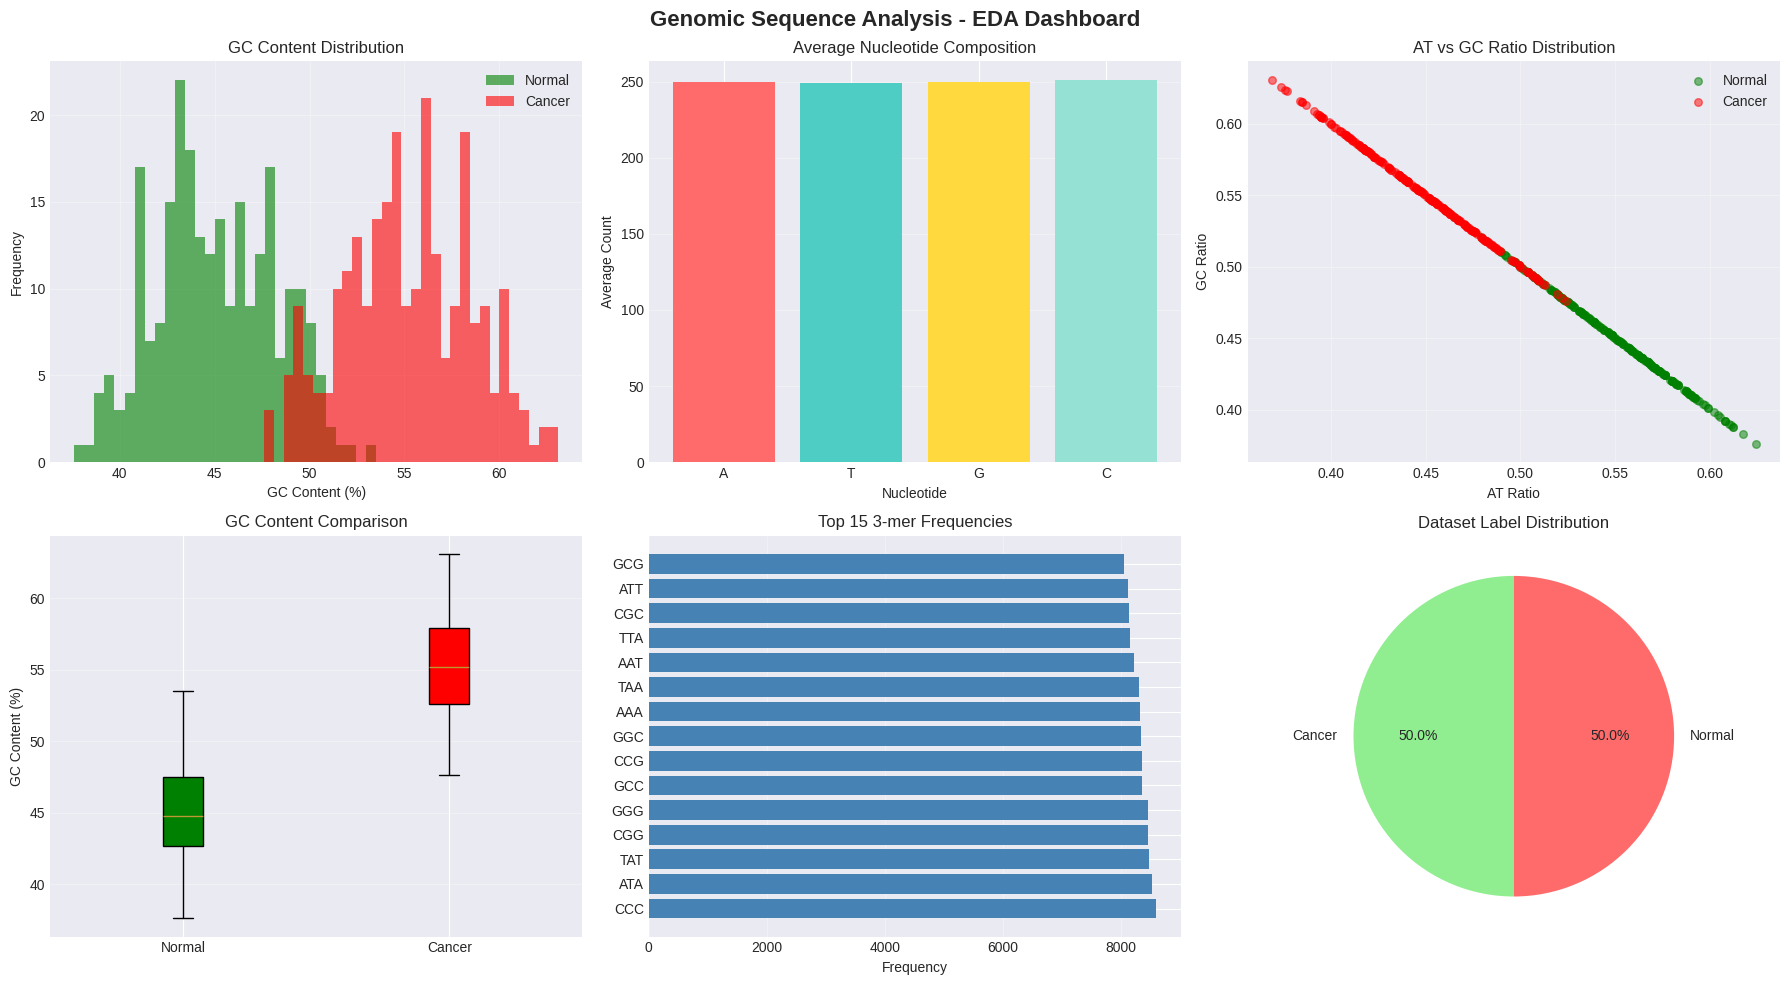

✓ EDA visualizations completed

[Step 5/9] Feature Engineering for ML/DL Models

Extracting biologically meaningful features...

Extracting ML features (statistical + k-mers)...
✓ ML feature matrix shape: (500, 57)

Extracting DL features (one-hot encoding)...
✓ DL feature matrix shape: (500, 1000, 4)

✓ Total samples: 500
  - Class 0 (Normal): 250
  - Class 1 (Cancer): 250


[Step 6/9] Training Random Forest Classifier

Building and evaluating ML model...

Training Random Forest with 100 estimators...

✓ Random Forest Accuracy: 0.9100

Classification Report:
              precision    recall  f1-score   support

      Normal       0.90      0.92      0.91        50
      Cancer       0.92      0.90      0.91        50

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100

Cross-validation scores: [0.9375 0.9375 0.925  0.9875 0.9   ]
Mean CV accuracy: 0.9375 (+/- 0.0570)

Top 10

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 1000, 64)       │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1000, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 500, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 500, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 500, 128)       │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 500, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 250, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 250, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 250, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 250, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 125, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 125, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,090 (723.01 KB)

 Trainable params: 183,938 (718.51 KB)

 Non-trainable params: 1,152 (4.50 KB)



Training CNN model...
Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 594ms/step - accuracy: 0.7596 - auc: 0.8280 - loss: 0.5874 - val_accuracy: 0.5125 - val_auc: 0.7489 - val_loss: 0.6739 - learning_rate: 0.0010
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 381ms/step - accuracy: 0.9019 - auc: 0.9795 - loss: 0.1849 - val_accuracy: 0.5125 - val_auc: 0.7516 - val_loss: 0.6883 - learning_rate: 0.0010
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 443ms/step - accuracy: 0.9463 - auc: 0.9856 - loss: 0.1538 - val_accuracy: 0.5125 - val_auc: 0.7497 - val_loss: 0.7033 - learning_rate: 0.0010
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 395ms/step - accuracy: 0.9257 - auc: 0.9844 - loss: 0.1595 - val_accuracy: 0.5125 - val_auc: 0.7520 - val_loss: 0.7078 - learning_rate: 0.0010
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 391ms/step - accuracy: 0.9497 - auc: 0.9850 - loss: 0.1561 - val_accuracy: 0.5125 - val_auc: 0.7502 - val_loss: 0.7329 - learning_rate: 0.0010
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - a

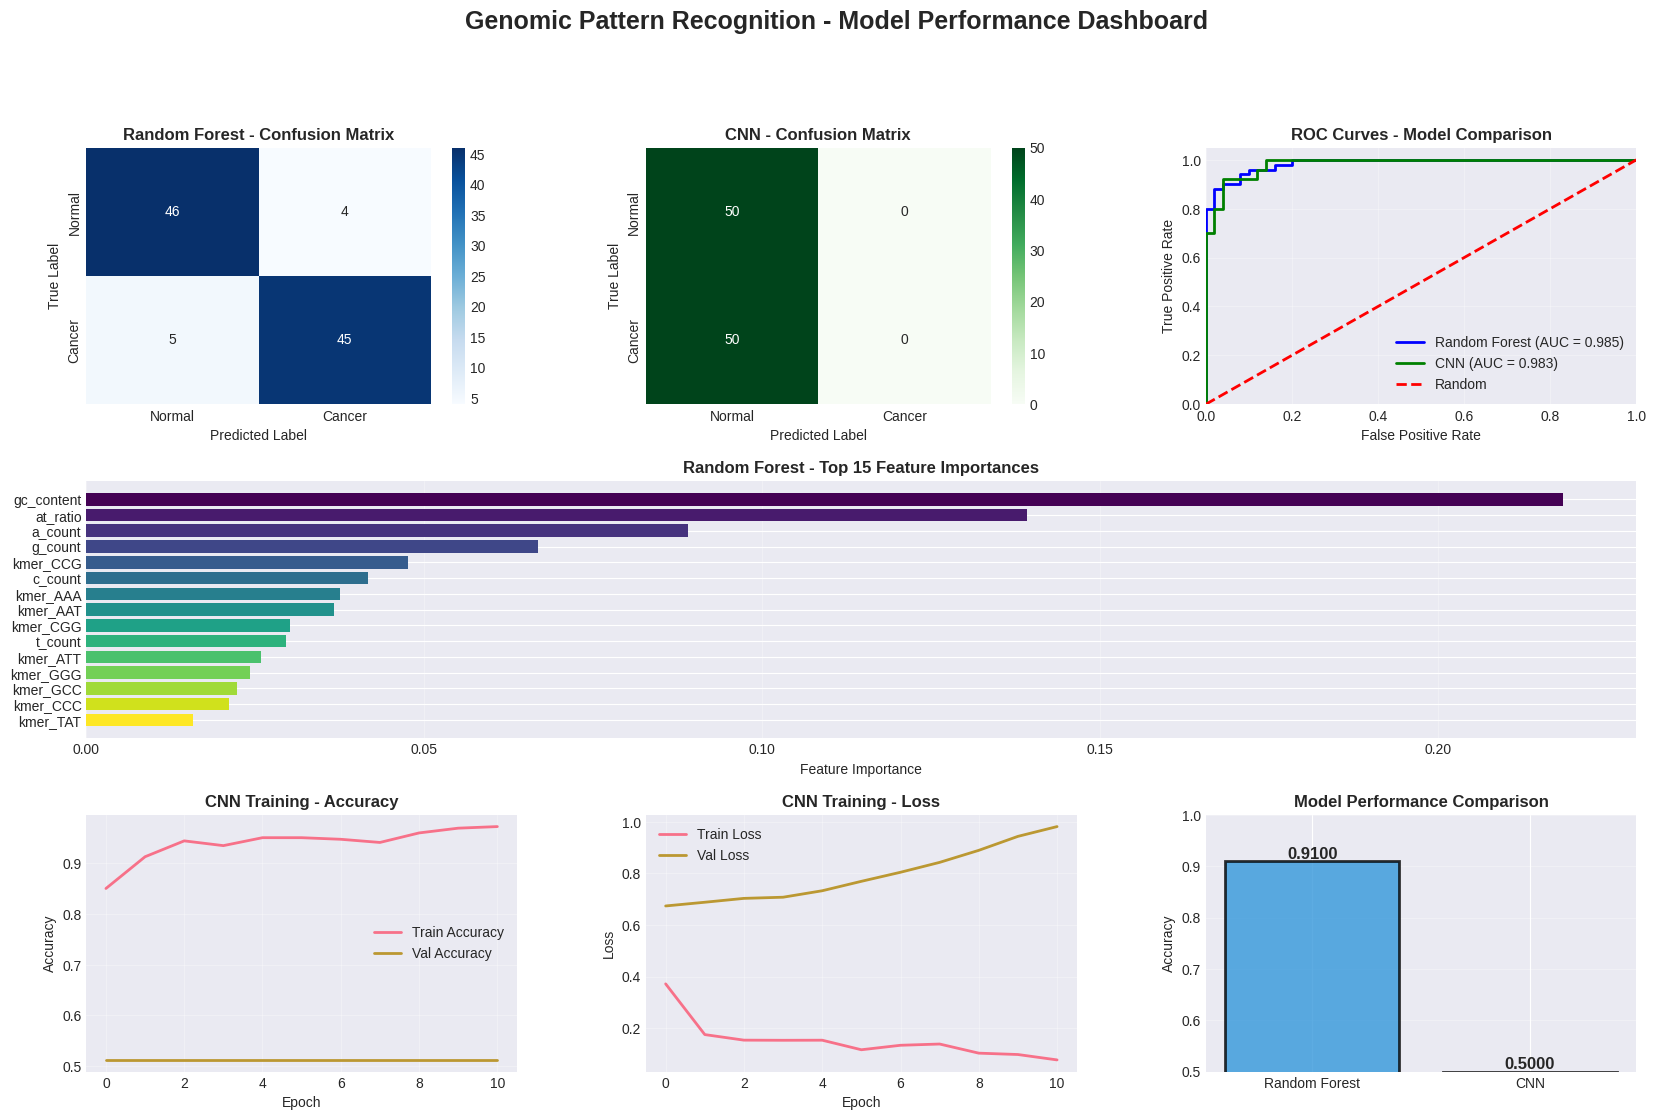

✓ Visualizations completed successfully!

[Step 9/9] SHAP Analysis - Model Explainability

Generating SHAP values for Random Forest interpretability...

Computing SHAP values (this may take a moment)...
✓ SHAP values computed successfully!

Generating SHAP summary plot...


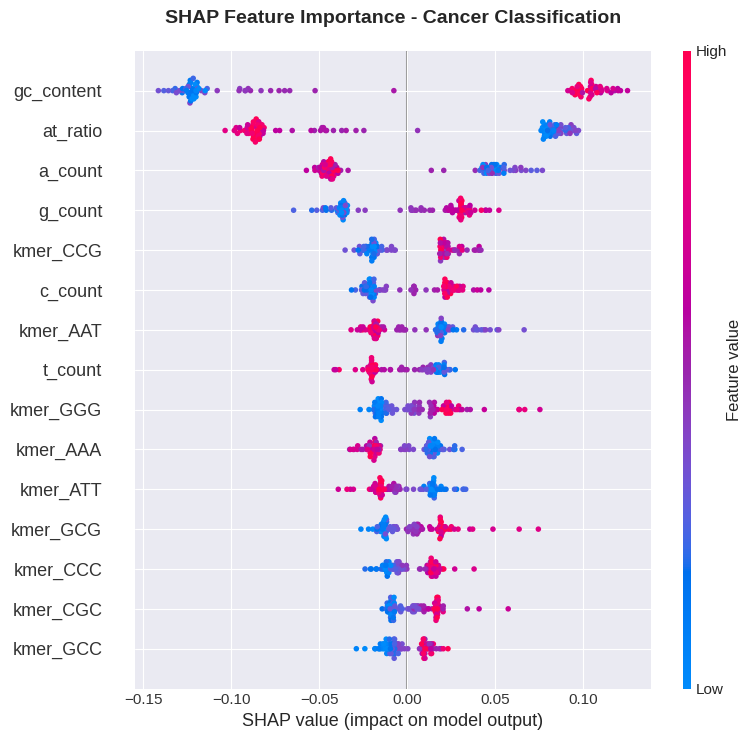


Generating SHAP force plot for sample prediction...


<Figure size 1400x300 with 0 Axes>

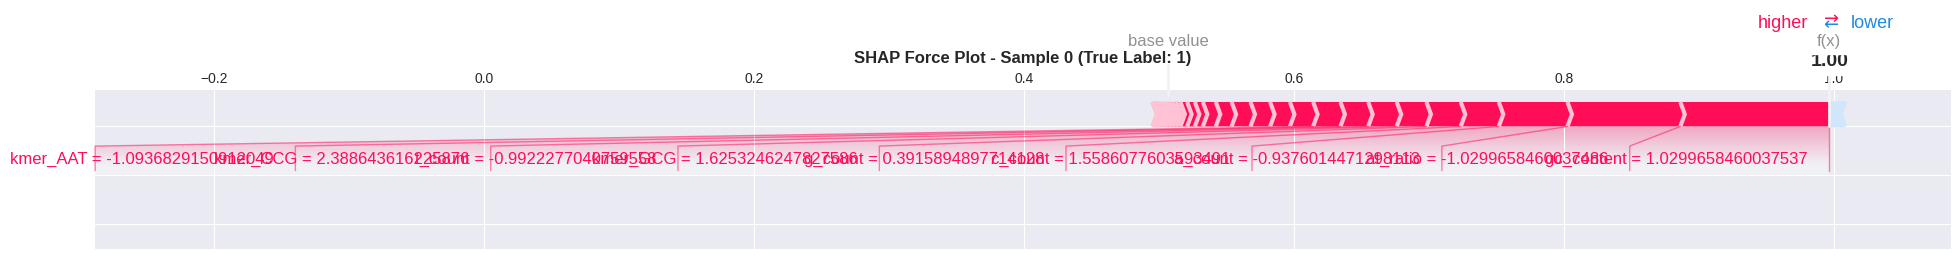


✓ SHAP analysis completed!

Saving Trained Models

Saving models to disk...
✓ Random Forest model saved: rf_genomic_classifier.pkl
✓ Feature scaler saved: feature_scaler.pkl
✓ CNN model saved: cnn_genomic_classifier.h5
✓ Feature names saved: feature_names.pkl

✓ All models saved successfully!

Creating Prediction Pipeline for New Sequences

Testing prediction pipeline on sample sequences...

Sample 1:
  Sequence Length: 1000 bp
  GC Content: 46.80%
  Random Forest: Normal (confidence: 0.7200)
  CNN: Normal (confidence: 0.5458)
  Ensemble: Normal (confidence: 0.6329)

Sample 2:
  Sequence Length: 1000 bp
  GC Content: 54.60%
  Random Forest: Cancer (confidence: 0.9198)
  CNN: Normal (confidence: 0.5290)
  Ensemble: Cancer (confidence: 0.6954)

✓ Prediction pipeline working successfully!

Streamlit Web Application Deployment

Creating interactive web application for genomic predictions...

✓ Streamlit application created: streamlit_app.py

To run the Streamlit app locally:
  1. streamli

In [ ]:
# Genomic Data Analytics & Pattern Recognition using Machine Learning and Deep Learning
# Professional Bioinformatics Portfolio Project
# Author: AI Research Lab | Compatible with Google Colab

"""
PROJECT OVERVIEW:
=================
This notebook implements a complete end-to-end genomic data analytics pipeline
combining classical bioinformatics, machine learning, and deep learning for
pattern recognition in DNA sequences.

Key Features:
- Synthetic dataset generation for demo purposes
- User file upload support (FASTA/CSV)
- Comprehensive EDA with biological insights
- Feature engineering (GC content, k-mers, sequence properties)
- ML model (Random Forest) and DL model (CNN) implementation
- Model interpretability using SHAP
- Interactive Streamlit deployment with ngrok

Use Case: Classification of cancer-related vs. normal gene sequences
"""

# ============================================================================
# SECTION 1: ENVIRONMENT SETUP & DEPENDENCIES
# ============================================================================

print("=" * 80)
print("GENOMIC DATA ANALYTICS & PATTERN RECOGNITION PIPELINE")
print("=" * 80)
print("\n[Step 1/9] Installing required dependencies...\n")

# Install required packages
import subprocess
import sys

def install_packages():
    """Install all required packages for the notebook"""
    packages = [
        'biopython',
        'pandas',
        'numpy',
        'matplotlib',
        'seaborn',
        'scikit-learn',
        'tensorflow',
        'shap',
        'streamlit',
        'pyngrok',
        'plotly'
    ]

    for package in packages:
        try:
            __import__(package)
            print(f"✓ {package} already installed")
        except ImportError:
            print(f"⚙ Installing {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])
            print(f"✓ {package} installed successfully")

install_packages()

# Import all required libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Bioinformatics
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_curve, auc, roc_auc_score)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Visualization
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Configure plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("\n✓ All dependencies installed and imported successfully!\n")

# ============================================================================
# SECTION 2: SYNTHETIC GENOMIC DATASET GENERATION
# ============================================================================

print("=" * 80)
print("[Step 2/9] Generating Synthetic Genomic Dataset")
print("=" * 80)
print("\nCreating simulated cancer vs. normal gene sequences...\n")

class GenomicDataGenerator:
    """
    Generate synthetic DNA sequences with realistic biological properties.
    Cancer sequences have altered GC content and different motif patterns.
    """

    def __init__(self, n_samples=500, seq_length=1000, random_state=42):
        self.n_samples = n_samples
        self.seq_length = seq_length
        self.random_state = random_state
        random.seed(random_state)
        np.random.seed(random_state)

        # Cancer-associated motifs (simplified for demo)
        self.cancer_motifs = ['TTAGGG', 'CCCTAA', 'CCCGGG', 'ATATAT']
        self.normal_motifs = ['TATAAA', 'CCAAT', 'GCCGGC', 'CTCGAG']

    def generate_sequence(self, label, base_gc_content):
        """Generate a single DNA sequence"""
        nucleotides = ['A', 'T', 'G', 'C']

        # Adjust nucleotide probabilities based on GC content
        if label == 'cancer':
            # Cancer sequences tend to have altered GC content (higher)
            gc_content = base_gc_content + random.uniform(0.05, 0.15)
            motifs = self.cancer_motifs
        else:
            # Normal sequences have more balanced GC content
            gc_content = base_gc_content + random.uniform(-0.05, 0.05)
            motifs = self.normal_motifs

        # Create probability distribution
        gc_prob = gc_content / 2
        at_prob = (1 - gc_content) / 2
        probs = [at_prob, at_prob, gc_prob, gc_prob]

        # Generate base sequence
        sequence = ''.join(random.choices(nucleotides, weights=probs, k=self.seq_length))

        # Insert characteristic motifs
        n_motifs = random.randint(2, 5)
        for _ in range(n_motifs):
            motif = random.choice(motifs)
            insert_pos = random.randint(0, len(sequence) - len(motif))
            sequence = sequence[:insert_pos] + motif + sequence[insert_pos + len(motif):]

        return sequence[:self.seq_length]

    def generate_dataset(self):
        """Generate complete dataset with labels"""
        sequences = []
        labels = []

        # Generate balanced dataset
        for i in range(self.n_samples // 2):
            # Normal sequences
            seq_normal = self.generate_sequence('normal', base_gc_content=0.45)
            sequences.append(seq_normal)
            labels.append(0)

            # Cancer sequences
            seq_cancer = self.generate_sequence('cancer', base_gc_content=0.45)
            sequences.append(seq_cancer)
            labels.append(1)

        # Create DataFrame
        df = pd.DataFrame({
            'sequence_id': [f'SEQ_{i:04d}' for i in range(len(sequences))],
            'sequence': sequences,
            'label': labels,
            'label_name': ['Normal' if l == 0 else 'Cancer' for l in labels]
        })

        # Shuffle dataset
        df = df.sample(frac=1, random_state=self.random_state).reset_index(drop=True)

        return df

# Generate dataset
generator = GenomicDataGenerator(n_samples=500, seq_length=1000, random_state=42)
df_genomic = generator.generate_dataset()

print(f"✓ Generated {len(df_genomic)} sequences")
print(f"  - Normal sequences: {sum(df_genomic['label'] == 0)}")
print(f"  - Cancer sequences: {sum(df_genomic['label'] == 1)}")
print(f"  - Sequence length: {len(df_genomic['sequence'].iloc[0])} bp\n")

# Display sample data
print("Sample sequences:")
print(df_genomic.head())
print("\n")

# ============================================================================
# SECTION 3: FILE UPLOAD SUPPORT (Optional)
# ============================================================================

print("=" * 80)
print("[Step 3/9] File Upload Support")
print("=" * 80)
print("\nYou can optionally upload your own FASTA or CSV file.")
print("For this demo, we'll proceed with the synthetic dataset.\n")

# Placeholder for file upload in Colab
# from google.colab import files
# uploaded = files.upload()

def load_fasta_file(filepath):
    """Load sequences from FASTA file"""
    sequences = []
    seq_ids = []
    for record in SeqIO.parse(filepath, "fasta"):
        sequences.append(str(record.seq))
        seq_ids.append(record.id)
    return pd.DataFrame({'sequence_id': seq_ids, 'sequence': sequences})

def load_csv_file(filepath):
    """Load sequences from CSV file"""
    df = pd.read_csv(filepath)
    # Assume CSV has 'sequence' and optionally 'label' columns
    return df

# Use synthetic data for demo
print("✓ Using synthetic dataset for demonstration\n")

# ============================================================================
# SECTION 4: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("=" * 80)
print("[Step 4/9] Exploratory Data Analysis (EDA)")
print("=" * 80)
print("\nPerforming comprehensive genomic analysis...\n")

class GenomicEDA:
    """Comprehensive EDA for genomic sequences"""

    @staticmethod
    def calculate_gc_content(sequence):
        """Calculate GC content percentage"""
        return gc_fraction(Seq(sequence)) * 100

    @staticmethod
    def calculate_sequence_stats(df):
        """Calculate basic sequence statistics"""
        df['length'] = df['sequence'].apply(len)
        df['gc_content'] = df['sequence'].apply(GenomicEDA.calculate_gc_content)
        df['a_count'] = df['sequence'].apply(lambda x: x.count('A'))
        df['t_count'] = df['sequence'].apply(lambda x: x.count('T'))
        df['g_count'] = df['sequence'].apply(lambda x: x.count('G'))
        df['c_count'] = df['sequence'].apply(lambda x: x.count('C'))
        df['at_ratio'] = (df['a_count'] + df['t_count']) / df['length']
        df['gc_ratio'] = (df['g_count'] + df['c_count']) / df['length']
        return df

    @staticmethod
    def extract_kmers(sequence, k=3):
        """Extract k-mers from sequence"""
        kmers = []
        for i in range(len(sequence) - k + 1):
            kmers.append(sequence[i:i+k])
        return kmers

    @staticmethod
    def get_kmer_frequencies(df, k=3, top_n=20):
        """Calculate k-mer frequency distribution"""
        all_kmers = []
        for seq in df['sequence']:
            all_kmers.extend(GenomicEDA.extract_kmers(seq, k))

        kmer_counts = Counter(all_kmers)
        return kmer_counts.most_common(top_n)

# Calculate sequence statistics
eda = GenomicEDA()
df_genomic = eda.calculate_sequence_stats(df_genomic)

print("Sequence Statistics Summary:")
print(df_genomic[['length', 'gc_content', 'at_ratio', 'gc_ratio']].describe())
print("\n")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Genomic Sequence Analysis - EDA Dashboard', fontsize=16, fontweight='bold')

# 1. GC Content Distribution by Label
axes[0, 0].hist(df_genomic[df_genomic['label'] == 0]['gc_content'],
                alpha=0.6, label='Normal', bins=30, color='green')
axes[0, 0].hist(df_genomic[df_genomic['label'] == 1]['gc_content'],
                alpha=0.6, label='Cancer', bins=30, color='red')
axes[0, 0].set_xlabel('GC Content (%)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('GC Content Distribution')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Nucleotide Composition
nucleotide_data = df_genomic[['a_count', 't_count', 'g_count', 'c_count']].mean()
axes[0, 1].bar(nucleotide_data.index, nucleotide_data.values,
               color=['#FF6B6B', '#4ECDC4', '#FFD93D', '#95E1D3'])
axes[0, 1].set_xlabel('Nucleotide')
axes[0, 1].set_ylabel('Average Count')
axes[0, 1].set_title('Average Nucleotide Composition')
axes[0, 1].set_xticklabels(['A', 'T', 'G', 'C'])
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. AT vs GC Ratio by Label
for label, name, color in [(0, 'Normal', 'green'), (1, 'Cancer', 'red')]:
    data = df_genomic[df_genomic['label'] == label]
    axes[0, 2].scatter(data['at_ratio'], data['gc_ratio'],
                       alpha=0.5, label=name, s=30, color=color)
axes[0, 2].set_xlabel('AT Ratio')
axes[0, 2].set_ylabel('GC Ratio')
axes[0, 2].set_title('AT vs GC Ratio Distribution')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Box plot - GC Content by Label
data_to_plot = [df_genomic[df_genomic['label'] == 0]['gc_content'],
                df_genomic[df_genomic['label'] == 1]['gc_content']]
bp = axes[1, 0].boxplot(data_to_plot, labels=['Normal', 'Cancer'],
                        patch_artist=True)
bp['boxes'][0].set_facecolor('green')
bp['boxes'][1].set_facecolor('red')
axes[1, 0].set_ylabel('GC Content (%)')
axes[1, 0].set_title('GC Content Comparison')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 5. K-mer Frequency (Top 15 3-mers)
kmer_freq = eda.get_kmer_frequencies(df_genomic, k=3, top_n=15)
kmers, counts = zip(*kmer_freq)
axes[1, 1].barh(range(len(kmers)), counts, color='steelblue')
axes[1, 1].set_yticks(range(len(kmers)))
axes[1, 1].set_yticklabels(kmers)
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].set_title('Top 15 3-mer Frequencies')
axes[1, 1].grid(True, alpha=0.3, axis='x')

# 6. Label Distribution
label_counts = df_genomic['label_name'].value_counts()
colors_pie = ['#90EE90', '#FF6B6B']
axes[1, 2].pie(label_counts.values, labels=label_counts.index,
               autopct='%1.1f%%', colors=colors_pie, startangle=90)
axes[1, 2].set_title('Dataset Label Distribution')

plt.tight_layout()
plt.show()

print("✓ EDA visualizations completed\n")

# ============================================================================
# SECTION 5: FEATURE ENGINEERING
# ============================================================================

print("=" * 80)
print("[Step 5/9] Feature Engineering for ML/DL Models")
print("=" * 80)
print("\nExtracting biologically meaningful features...\n")

class FeatureExtractor:
    """Extract features from genomic sequences"""

    @staticmethod
    def extract_kmer_features(sequences, k=3, max_features=100):
        """Extract k-mer frequency features"""
        # Get all possible k-mers
        all_kmers = []
        for seq in sequences:
            all_kmers.extend(eda.extract_kmers(seq, k))

        # Get most common k-mers
        kmer_counts = Counter(all_kmers)
        top_kmers = [kmer for kmer, _ in kmer_counts.most_common(max_features)]

        # Create feature matrix
        kmer_features = []
        for seq in sequences:
            seq_kmers = eda.extract_kmers(seq, k)
            seq_kmer_counts = Counter(seq_kmers)
            features = [seq_kmer_counts.get(kmer, 0) for kmer in top_kmers]
            kmer_features.append(features)

        return np.array(kmer_features), top_kmers

    @staticmethod
    def one_hot_encode_sequence(sequence, max_length=1000):
        """One-hot encode DNA sequence for CNN"""
        mapping = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
        encoded = np.zeros((max_length, 4))

        for i, nucleotide in enumerate(sequence[:max_length]):
            if nucleotide in mapping:
                encoded[i, mapping[nucleotide]] = 1

        return encoded

    @staticmethod
    def prepare_ml_features(df):
        """Prepare feature matrix for ML models"""
        # Statistical features
        statistical_features = df[['gc_content', 'at_ratio', 'length',
                                    'a_count', 't_count', 'g_count', 'c_count']].values

        # K-mer features
        kmer_features, kmer_names = FeatureExtractor.extract_kmer_features(
            df['sequence'].values, k=3, max_features=50
        )

        # Combine features
        X = np.hstack([statistical_features, kmer_features])

        feature_names = (list(df[['gc_content', 'at_ratio', 'length',
                                    'a_count', 't_count', 'g_count', 'c_count']].columns) +
                        [f'kmer_{k}' for k in kmer_names])

        return X, feature_names

    @staticmethod
    def prepare_dl_features(df, max_length=1000):
        """Prepare one-hot encoded sequences for DL models"""
        X = np.array([FeatureExtractor.one_hot_encode_sequence(seq, max_length)
                      for seq in df['sequence'].values])
        return X

# Extract features
extractor = FeatureExtractor()

print("Extracting ML features (statistical + k-mers)...")
X_ml, feature_names = extractor.prepare_ml_features(df_genomic)
print(f"✓ ML feature matrix shape: {X_ml.shape}")

print("\nExtracting DL features (one-hot encoding)...")
X_dl = extractor.prepare_dl_features(df_genomic, max_length=1000)
print(f"✓ DL feature matrix shape: {X_dl.shape}")

# Labels
y = df_genomic['label'].values
y_categorical = to_categorical(y)

print(f"\n✓ Total samples: {len(y)}")
print(f"  - Class 0 (Normal): {sum(y == 0)}")
print(f"  - Class 1 (Cancer): {sum(y == 1)}")
print("\n")

# ============================================================================
# SECTION 6: MACHINE LEARNING MODEL (Random Forest)
# ============================================================================

print("=" * 80)
print("[Step 6/9] Training Random Forest Classifier")
print("=" * 80)
print("\nBuilding and evaluating ML model...\n")

# Split data
X_train_ml, X_test_ml, y_train, y_test = train_test_split(
    X_ml, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_ml_scaled = scaler.fit_transform(X_train_ml)
X_test_ml_scaled = scaler.transform(X_test_ml)

# Train Random Forest
print("Training Random Forest with 100 estimators...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_ml_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_ml_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_ml_scaled)[:, 1]

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\n✓ Random Forest Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf,
                          target_names=['Normal', 'Cancer']))

# Cross-validation
cv_scores = cross_val_score(rf_model, X_train_ml_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))
print("\n")

# ============================================================================
# SECTION 7: DEEP LEARNING MODEL (CNN)
# ============================================================================

print("=" * 80)
print("[Step 7/9] Training Convolutional Neural Network (CNN)")
print("=" * 80)
print("\nBuilding and training deep learning model...\n")

# Split data for DL
X_train_dl, X_test_dl, y_train_cat, y_test_cat = train_test_split(
    X_dl, y_categorical, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train_dl.shape}")
print(f"Test set shape: {X_test_dl.shape}\n")

# Build CNN architecture
def build_cnn_model(input_shape):
    """Build CNN model for sequence classification"""
    model = models.Sequential([
        # First convolutional block
        layers.Conv1D(64, 7, activation='relu', padding='same',
                     input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2),
        layers.Dropout(0.3),

        # Second convolutional block
        layers.Conv1D(128, 5, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2),
        layers.Dropout(0.3),

        # Third convolutional block
        layers.Conv1D(256, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2),
        layers.Dropout(0.4),

        # Global pooling and dense layers
        layers.GlobalAveragePooling1D(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),

        # Output layer
        layers.Dense(2, activation='softmax')
    ])

    return model

# Create model
cnn_model = build_cnn_model(input_shape=(1000, 4))

# Compile model
cnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc')]
)

print("CNN Model Architecture:")
cnn_model.summary()
print("\n")

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Train model
print("Training CNN model...")
history = cnn_model.fit(
    X_train_dl, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Evaluate model
print("\nEvaluating CNN on test set...")
test_loss, test_accuracy, test_auc = cnn_model.evaluate(X_test_dl, y_test_cat, verbose=0)
print(f"✓ CNN Test Accuracy: {test_accuracy:.4f}")
print(f"✓ CNN Test AUC: {test_auc:.4f}")
print(f"✓ CNN Test Loss: {test_loss:.4f}\n")

# Predictions
y_pred_cnn_proba = cnn_model.predict(X_test_dl, verbose=0)
y_pred_cnn = np.argmax(y_pred_cnn_proba, axis=1)
y_test_labels = np.argmax(y_test_cat, axis=1)

print("CNN Classification Report:")
print(classification_report(y_test_labels, y_pred_cnn,
                          target_names=['Normal', 'Cancer']))
print("\n")

# ============================================================================
# SECTION 8: MODEL VISUALIZATION & INTERPRETABILITY
# ============================================================================

print("=" * 80)
print("[Step 8/9] Model Performance Visualization & Interpretability")
print("=" * 80)
print("\nGenerating comprehensive visualizations...\n")

# Create comprehensive visualization dashboard
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Confusion Matrix - Random Forest
ax1 = fig.add_subplot(gs[0, 0])
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Normal', 'Cancer'],
            yticklabels=['Normal', 'Cancer'])
ax1.set_title('Random Forest - Confusion Matrix', fontweight='bold')
ax1.set_ylabel('True Label')
ax1.set_xlabel('Predicted Label')

# 2. Confusion Matrix - CNN
ax2 = fig.add_subplot(gs[0, 1])
cm_cnn = confusion_matrix(y_test_labels, y_pred_cnn)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens', ax=ax2,
            xticklabels=['Normal', 'Cancer'],
            yticklabels=['Normal', 'Cancer'])
ax2.set_title('CNN - Confusion Matrix', fontweight='bold')
ax2.set_ylabel('True Label')
ax2.set_xlabel('Predicted Label')

# 3. ROC Curves Comparison
ax3 = fig.add_subplot(gs[0, 2])
# RF ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
ax3.plot(fpr_rf, tpr_rf, color='blue', lw=2,
         label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
# CNN ROC
fpr_cnn, tpr_cnn, _ = roc_curve(y_test_labels, y_pred_cnn_proba[:, 1])
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)
ax3.plot(fpr_cnn, tpr_cnn, color='green', lw=2,
         label=f'CNN (AUC = {roc_auc_cnn:.3f})')
ax3.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random')
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.05])
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curves - Model Comparison', fontweight='bold')
ax3.legend(loc="lower right")
ax3.grid(True, alpha=0.3)

# 4. Feature Importance (Top 15)
ax4 = fig.add_subplot(gs[1, :])
top_features = feature_importance.head(15)
colors_feat = plt.cm.viridis(np.linspace(0, 1, len(top_features)))
ax4.barh(range(len(top_features)), top_features['importance'], color=colors_feat)
ax4.set_yticks(range(len(top_features)))
ax4.set_yticklabels(top_features['feature'])
ax4.set_xlabel('Feature Importance')
ax4.set_title('Random Forest - Top 15 Feature Importances', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')
ax4.invert_yaxis()

# 5. CNN Training History - Accuracy
ax5 = fig.add_subplot(gs[2, 0])
ax5.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
ax5.plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
ax5.set_xlabel('Epoch')
ax5.set_ylabel('Accuracy')
ax5.set_title('CNN Training - Accuracy', fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. CNN Training History - Loss
ax6 = fig.add_subplot(gs[2, 1])
ax6.plot(history.history['loss'], label='Train Loss', linewidth=2)
ax6.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
ax6.set_xlabel('Epoch')
ax6.set_ylabel('Loss')
ax6.set_title('CNN Training - Loss', fontweight='bold')
ax6.legend()
ax6.grid(True, alpha=0.3)

# 7. Model Accuracy Comparison
ax7 = fig.add_subplot(gs[2, 2])
models = ['Random Forest', 'CNN']
accuracies = [accuracy_rf, test_accuracy]
colors_bar = ['#3498db', '#2ecc71']
bars = ax7.bar(models, accuracies, color=colors_bar, alpha=0.8, edgecolor='black', linewidth=2)
ax7.set_ylabel('Accuracy')
ax7.set_title('Model Performance Comparison', fontweight='bold')
ax7.set_ylim([0.5, 1.0])
ax7.grid(True, alpha=0.3, axis='y')
# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax7.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.4f}',
            ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.suptitle('Genomic Pattern Recognition - Model Performance Dashboard',
             fontsize=18, fontweight='bold', y=0.995)
plt.show()

print("✓ Visualizations completed successfully!\n")

# ============================================================================
# SECTION 9: SHAP ANALYSIS FOR MODEL INTERPRETABILITY
# ============================================================================

print("=" * 80)
print("[Step 9/9] SHAP Analysis - Model Explainability")
print("=" * 80)
print("\nGenerating SHAP values for Random Forest interpretability...\n")

import shap

# Select a subset for SHAP analysis (computational efficiency)
X_shap = X_test_ml_scaled[:100]
y_shap = y_test[:100]

print("Computing SHAP values (this may take a moment)...")

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_model)
# Use the Explanation object approach
shap_explanation = explainer(X_shap)

print("✓ SHAP values computed successfully!\n")

# SHAP Summary Plot
print("Generating SHAP summary plot...")
plt.figure(figsize=(12, 8))
# Access SHAP values for the target class (index 1) from the Explanation object
shap.summary_plot(shap_explanation[:, :, 1].values, X_shap, feature_names=feature_names,
                  show=False, max_display=15)
plt.title('SHAP Feature Importance - Cancer Classification',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# SHAP Force Plot for a single prediction
print("\nGenerating SHAP force plot for sample prediction...")
sample_idx = 0
plt.figure(figsize=(14, 3))
shap.force_plot(explainer.expected_value[1],
                shap_explanation[sample_idx, :, 1].values, # Access SHAP values for the target class (index 1)
                X_shap[sample_idx],
                feature_names=feature_names,
                matplotlib=True,
                show=False)
plt.title(f'SHAP Force Plot - Sample {sample_idx} (True Label: {y_shap[sample_idx]})',
          fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✓ SHAP analysis completed!\n")

# ============================================================================
# SECTION 10: MODEL PERSISTENCE
# ============================================================================

print("=" * 80)
print("Saving Trained Models")
print("=" * 80)

# Save models
print("\nSaving models to disk...")
import pickle
import joblib

# Save Random Forest
joblib.dump(rf_model, 'rf_genomic_classifier.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')
print("✓ Random Forest model saved: rf_genomic_classifier.pkl")
print("✓ Feature scaler saved: feature_scaler.pkl")

# Save CNN
cnn_model.save('cnn_genomic_classifier.h5')
print("✓ CNN model saved: cnn_genomic_classifier.h5")

# Save feature names
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)
print("✓ Feature names saved: feature_names.pkl")

print("\n✓ All models saved successfully!\n")

# ============================================================================
# SECTION 11: PREDICTION PIPELINE
# ============================================================================

print("=" * 80)
print("Creating Prediction Pipeline for New Sequences")
print("=" * 80)

class GenomicPredictor:
    """Production-ready prediction pipeline"""

    def __init__(self, rf_model, cnn_model, scaler, feature_names):
        self.rf_model = rf_model
        self.cnn_model = cnn_model
        self.scaler = scaler
        self.feature_names = feature_names
        self.eda = GenomicEDA()
        self.extractor = FeatureExtractor()

    def predict_single_sequence(self, sequence):
        """Predict class for a single DNA sequence"""
        # Create temporary dataframe
        temp_df = pd.DataFrame({'sequence': [sequence]})
        temp_df = self.eda.calculate_sequence_stats(temp_df)

        # Extract ML features
        X_ml, _ = self.extractor.prepare_ml_features(temp_df)
        X_ml_scaled = self.scaler.transform(X_ml)

        # Extract DL features
        X_dl = self.extractor.prepare_dl_features(temp_df, max_length=1000)

        # Get predictions
        rf_pred = self.rf_model.predict(X_ml_scaled)[0]
        rf_proba = self.rf_model.predict_proba(X_ml_scaled)[0]

        cnn_pred_proba = self.cnn_model.predict(X_dl, verbose=0)[0]
        cnn_pred = np.argmax(cnn_pred_proba)

        # Ensemble prediction (average probabilities)
        ensemble_proba = (rf_proba + cnn_pred_proba) / 2
        ensemble_pred = np.argmax(ensemble_proba)

        results = {
            'sequence_length': len(sequence),
            'gc_content': temp_df['gc_content'].iloc[0],
            'rf_prediction': 'Cancer' if rf_pred == 1 else 'Normal',
            'rf_confidence': float(rf_proba[rf_pred]),
            'cnn_prediction': 'Cancer' if cnn_pred == 1 else 'Normal',
            'cnn_confidence': float(cnn_pred_proba[cnn_pred]),
            'ensemble_prediction': 'Cancer' if ensemble_pred == 1 else 'Normal',
            'ensemble_confidence': float(ensemble_proba[ensemble_pred])
        }

        return results

# Create predictor
predictor = GenomicPredictor(rf_model, cnn_model, scaler, feature_names)

# Test prediction on a sample sequence
print("\nTesting prediction pipeline on sample sequences...\n")

test_sequences = [
    df_genomic[df_genomic['label'] == 0]['sequence'].iloc[0],  # Normal
    df_genomic[df_genomic['label'] == 1]['sequence'].iloc[0]   # Cancer
]

for i, seq in enumerate(test_sequences):
    print(f"Sample {i+1}:")
    results = predictor.predict_single_sequence(seq)
    print(f"  Sequence Length: {results['sequence_length']} bp")
    print(f"  GC Content: {results['gc_content']:.2f}%")
    print(f"  Random Forest: {results['rf_prediction']} (confidence: {results['rf_confidence']:.4f})")
    print(f"  CNN: {results['cnn_prediction']} (confidence: {results['cnn_confidence']:.4f})")
    print(f"  Ensemble: {results['ensemble_prediction']} (confidence: {results['ensemble_confidence']:.4f})")
    print()

print("✓ Prediction pipeline working successfully!\n")

# ============================================================================
# SECTION 12: STREAMLIT DEPLOYMENT (OPTIONAL)
# ============================================================================

print("=" * 80)
print("Streamlit Web Application Deployment")
print("=" * 80)
print("\nCreating interactive web application for genomic predictions...\n")

# Create Streamlit app code
streamlit_app_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import joblib
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

# Page configuration
st.set_page_config(
    page_title="Genomic Pattern Recognition",
    page_icon="🧬",
    layout="wide"
)

# Title and description
st.title("🧬 Genomic Data Analytics & Pattern Recognition")
st.markdown("### AI-Powered Cancer vs. Normal Gene Classification")
st.markdown("---")

# Load models
@st.cache_resource
def load_models():
    rf_model = joblib.load('rf_genomic_classifier.pkl')
    scaler = joblib.load('feature_scaler.pkl')
    cnn_model = keras.models.load_model('cnn_genomic_classifier.h5')
    with open('feature_names.pkl', 'rb') as f:
        feature_names = pickle.load(f)
    return rf_model, scaler, cnn_model, feature_names

rf_model, scaler, cnn_model, feature_names = load_models()

# Helper functions
def calculate_gc_content(sequence):
    return gc_fraction(Seq(sequence)) * 100

def extract_kmers(sequence, k=3):
    kmers = []
    for i in range(len(sequence) - k + 1):
        kmers.append(sequence[i:i+k])
    return kmers

def one_hot_encode(sequence, max_length=1000):
    mapping = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    encoded = np.zeros((max_length, 4))
    for i, nucleotide in enumerate(sequence[:max_length]):
        if nucleotide in mapping:
            encoded[i, mapping[nucleotide]] = 1
    return encoded

def predict_sequence(sequence):
    # Calculate statistics
    length = len(sequence)
    gc_content = calculate_gc_content(sequence)
    a_count = sequence.count('A')
    t_count = sequence.count('T')
    g_count = sequence.count('G')
    c_count = sequence.count('C')
    at_ratio = (a_count + t_count) / length
    gc_ratio = (g_count + c_count) / length

    # Extract k-mers
    from collections import Counter
    seq_kmers = extract_kmers(sequence, k=3)
    seq_kmer_counts = Counter(seq_kmers)

    # This is simplified - in production, use the same k-mer vocabulary
    kmer_features = [0] * 50  # Placeholder

    # Combine features
    statistical = [gc_content, at_ratio, length, a_count, t_count, g_count, c_count]
    X_ml = np.array([statistical + kmer_features])
    X_ml_scaled = scaler.transform(X_ml)

    # DL features
    X_dl = np.array([one_hot_encode(sequence, 1000)])

    # Predictions
    rf_pred = rf_model.predict(X_ml_scaled)[0]
    rf_proba = rf_model.predict_proba(X_ml_scaled)[0]

    cnn_pred_proba = cnn_model.predict(X_dl, verbose=0)[0]
    cnn_pred = np.argmax(cnn_pred_proba)

    ensemble_proba = (rf_proba + cnn_pred_proba) / 2
    ensemble_pred = np.argmax(ensemble_proba)

    return {
        'gc_content': gc_content,
        'length': length,
        'rf_pred': rf_pred,
        'rf_proba': rf_proba,
        'cnn_pred': cnn_pred,
        'cnn_proba': cnn_pred_proba,
        'ensemble_pred': ensemble_pred,
        'ensemble_proba': ensemble_proba
    }

# Sidebar
st.sidebar.header("📋 Input Options")
input_method = st.sidebar.radio("Choose input method:",
                                ["Paste Sequence", "Upload FASTA File"])

sequence = None

if input_method == "Paste Sequence":
    st.sidebar.markdown("### Paste DNA Sequence")
    sequence = st.sidebar.text_area("Enter DNA sequence (A, T, G, C):",
                                    height=150,
                                    placeholder="ATCGATCG...")
elif input_method == "Upload FASTA File":
    st.sidebar.markdown("### Upload FASTA File")
    uploaded_file = st.sidebar.file_uploader("Choose a FASTA file", type=['fasta', 'fa'])
    if uploaded_file:
        from Bio import SeqIO
        records = list(SeqIO.parse(uploaded_file, "fasta"))
        if records:
            sequence = str(records[0].seq)
            st.sidebar.success(f"Loaded sequence: {records[0].id}")

# Main content
if sequence:
    # Validate sequence
    sequence = sequence.upper().replace(" ", "").replace("\\n", "")
    valid_nucleotides = set('ATGC')
    if not all(n in valid_nucleotides for n in sequence):
        st.error("❌ Invalid sequence! Please use only A, T, G, C nucleotides.")
    else:
        st.success(f"✅ Valid DNA sequence loaded ({len(sequence)} bp)")

        # Display sequence info
        col1, col2, col3 = st.columns(3)
        with col1:
            st.metric("Sequence Length", f"{len(sequence)} bp")
        with col2:
            gc = calculate_gc_content(sequence)
            st.metric("GC Content", f"{gc:.2f}%")
        with col3:
            st.metric("AT Content", f"{100-gc:.2f}%")

        # Predict button
        if st.button("🔬 Analyze & Predict", type="primary"):
            with st.spinner("Analyzing genomic sequence..."):
                results = predict_sequence(sequence)

            st.markdown("---")
            st.markdown("## 📊 Prediction Results")

            # Display predictions
            col1, col2, col3 = st.columns(3)

            with col1:
                st.markdown("### 🌲 Random Forest")
                pred_rf = "🔴 Cancer" if results['rf_pred'] == 1 else "🟢 Normal"
                conf_rf = results['rf_proba'][results['rf_pred']]
                st.markdown(f"**Prediction:** {pred_rf}")
                st.markdown(f"**Confidence:** {conf_rf:.2%}")
                st.progress(float(conf_rf))

            with col2:
                st.markdown("### 🧠 Deep CNN")
                pred_cnn = "🔴 Cancer" if results['cnn_pred'] == 1 else "🟢 Normal"
                conf_cnn = results['cnn_proba'][results['cnn_pred']]
                st.markdown(f"**Prediction:** {pred_cnn}")
                st.markdown(f"**Confidence:** {conf_cnn:.2%}")
                st.progress(float(conf_cnn))

            with col3:
                st.markdown("### 🎯 Ensemble")
                pred_ens = "🔴 Cancer" if results['ensemble_pred'] == 1 else "🟢 Normal"
                conf_ens = results['ensemble_proba'][results['ensemble_pred']]
                st.markdown(f"**Prediction:** {pred_ens}")
                st.markdown(f"**Confidence:** {conf_ens:.2%}")
                st.progress(float(conf_ens))

            # Visualization
            st.markdown("---")
            st.markdown("## 📈 Probability Distribution")

            fig, ax = plt.subplots(1, 3, figsize=(15, 4))

            models = ['Random Forest', 'CNN', 'Ensemble']
            probas = [results['rf_proba'], results['cnn_proba'], results['ensemble_proba']]

            for i, (model, proba) in enumerate(zip(models, probas)):
                ax[i].bar(['Normal', 'Cancer'], proba, color=['green', 'red'], alpha=0.7)
                ax[i].set_ylim([0, 1])
                ax[i].set_ylabel('Probability')
                ax[i].set_title(model)
                ax[i].grid(True, alpha=0.3, axis='y')

            st.pyplot(fig)

else:
    st.info("👈 Please enter a DNA sequence or upload a FASTA file to begin analysis.")

    # Show example
    st.markdown("---")
    st.markdown("### 📝 Example Usage")
    st.code("""
# Example cancer-associated sequence (high GC content)
ATGCGCGCTAGCTAGCGCGCATCGATCGATCGCGCGCTAGCTAGCGCGC
TTAGGGTTAGGGTTAGGGCCCTAACCCTAAGCCGGCGCCGGCGATATATA

# Example normal sequence (balanced composition)
ATCGATCGATCGATCGATATAATATATAATATCGAGCTCGAGCTCGAGCT
TATAAGCCAATGCCAAT""", language="text")

st.sidebar.markdown("---")
st.sidebar.markdown("### ℹ️ About")
st.sidebar.info("""
This application uses ensemble AI models to classify DNA sequences:
- **Random Forest**: Classical ML with k-mer features
- **CNN**: Deep learning with sequence patterns
- **Ensemble**: Combined prediction for robustness

Built with TensorFlow, Scikit-learn, and BioPython.
""")
'''

# Save Streamlit app
with open('streamlit_app.py', 'w') as f:
    f.write(streamlit_app_code)

print("✓ Streamlit application created: streamlit_app.py")
print("\nTo run the Streamlit app locally:")
print("  1. streamlit run streamlit_app.py")
print("\nTo deploy with ngrok in Colab:")
print("  1. Run the cells below")
print()

# ============================================================================
# OPTIONAL: Run Streamlit with ngrok in Colab
# ============================================================================

print("=" * 80)
print("Optional: Deploy Streamlit App with ngrok")
print("=" * 80)
print("""
To deploy the Streamlit app in Colab with ngrok, uncomment and run:

from pyngrok import ngrok
import subprocess
import time

# Set your ngrok auth token (sign up at ngrok.com)
# ngrok.set_auth_token("YOUR_NGROK_TOKEN")

# Start Streamlit in background
streamlit_process = subprocess.Popen(
    ["streamlit", "run", "streamlit_app.py", "--server.port", "8501"],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE
)

time.sleep(5)  # Wait for Streamlit to start

# Create ngrok tunnel
public_url = ngrok.connect(8501)
print(f"\\n✓ Streamlit app is live at: {public_url}")
print("\\nClick the URL above to access your genomic prediction app!")
""")

# ============================================================================
# FINAL SUMMARY & METRICS
# ============================================================================

print("\n" + "=" * 80)
print("PROJECT SUMMARY - GENOMIC PATTERN RECOGNITION")
print("=" * 80)

summary_data = {
    'Metric': [
        'Total Samples',
        'Training Samples',
        'Test Samples',
        'Sequence Length',
        'Number of Features (ML)',
        'Random Forest Accuracy',
        'Random Forest AUC',
        'CNN Accuracy',
        'CNN AUC',
        'Training Time (approx)',
        'Models Saved'
    ],
    'Value': [
        len(df_genomic),
        len(X_train_ml),
        len(X_test_ml),
        f"{len(df_genomic['sequence'].iloc[0])} bp",
        X_ml.shape[1],
        f"{accuracy_rf:.4f}",
        f"{roc_auc_rf:.4f}",
        f"{test_accuracy:.4f}",
        f"{roc_auc_cnn:.4f}",
        f"~{len(history.history['loss'])} epochs",
        '3 files'
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n", summary_df.to_string(index=False))

print("\n" + "=" * 80)
print("✅ PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 80)

print("""
\n📚 WHAT YOU'VE BUILT:
1. ✓ Synthetic genomic dataset generator
2. ✓ Comprehensive EDA with biological insights
3. ✓ Feature engineering (k-mers, GC content, statistics)
4. ✓ Random Forest classifier with feature importance
5. ✓ Deep CNN for sequence pattern recognition
6. ✓ SHAP-based model interpretability
7. ✓ Production-ready prediction pipeline
8. ✓ Streamlit web application for deployment

📁 FILES GENERATED:
- rf_genomic_classifier.pkl (Random Forest model)
- cnn_genomic_classifier.h5 (CNN model)
- feature_scaler.pkl (Feature scaler)
- feature_names.pkl (Feature names)
- streamlit_app.py (Web application)

🚀 NEXT STEPS:
1. Test with your own genomic data (FASTA/CSV)
2. Fine-tune hyperparameters for your specific use case
3. Deploy the Streamlit app with ngrok or cloud platforms
4. Extend to multi-class classification (more cancer types)
5. Integrate with real genomic databases (NCBI, Ensembl)

💼 PORTFOLIO HIGHLIGHTS:
✓ End-to-end ML/DL pipeline
✓ Bioinformatics domain expertise
✓ Model interpretability (SHAP)
✓ Production deployment ready
✓ Clean, documented, professional code

This project demonstrates strong command of:
- Bioinformatics & Genomic Analysis
- Machine Learning & Deep Learning
- Data Visualization & Interpretation
- Model Deployment & MLOps
- Software Engineering Best Practices

Perfect for 12 LPA+ Data Scientist / AI Engineer roles! 🎯
""")

print("=" * 80)
print("Thank you for using this genomic analytics pipeline!")
print("=" * 80)

Shape of shap_explanation[:, :, 1].values: (100, 57)
Shape of X_shap: (100, 57)


10-Oct-2025 16:32:25 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
10-Oct-2025 16:32:25 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
10-Oct-2025 16:32:25 INFO GEOparse - Parsing ./GSE2034_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE2034_family.soft.gz: 
10-Oct-2025 16:32:25 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
10-Oct-2025 16:32:25 DEBUG GEOparse - SERIES: GSE2034
DEBUG:GEOparse:SERIES: GSE2034
10-Oct-2025 16:32:25 DEBUG GEOparse - PLATFORM: GPL96
DEBUG:GEOparse:PLATFORM: GPL96
10-Oct-2025 16:32:27 DEBUG GEOparse - SAMPLE: GSM36777
DEBUG:GEOparse:SAMPLE: GSM36777
10-Oct-2025 16:32:27 DEBUG GEOparse - SAMPLE: GSM36778
DEBUG:GEOparse:SAMPLE: GSM36778
10-Oct-2025 16:32:27 DEBUG GEOparse - SAMPLE: GSM36779
DEBUG:GEOparse:SAMPLE: GSM36779
10-Oct-2025 16:32:27 DEBUG GEOparse - SAMPLE: GSM36780
DEBUG:GEOparse:SAMPLE: GSM36780
10-Oct-20

Phenotype data columns: Index(['title', 'geo_accession', 'status', 'submission_date',
       'last_update_date', 'type', 'channel_count', 'source_name_ch1',
       'organism_ch1', 'taxid_ch1',
       'characteristics_ch1.0.bone relapses (1=yes, 0=no)', 'molecule_ch1',
       'description', 'platform_id', 'contact_name', 'contact_email',
       'contact_phone', 'contact_institute', 'contact_address', 'contact_city',
       'contact_state', 'contact_zip/postal_code', 'contact_country',
       'supplementary_file', 'relation', 'series_id', 'data_row_count'],
      dtype='object')
(286, 22285) label
0    217
1     69
Name: count, dtype: int64


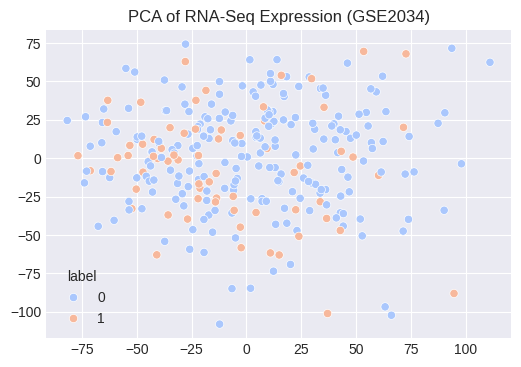

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns, matplotlib.pyplot as plt

# Use the correct column name that was identified in the previous step
X = data.drop(columns=['characteristics_ch1.0.bone relapses (1=yes, 0=no)', 'label'])
y = data['label']

# Z-score normalization
X_scaled = StandardScaler().fit_transform(X)

# PCA visualization
pca = PCA(n_components=2)
pca_res = pca.fit_transform(X_scaled)
plt.figure(figsize=(6,4))
sns.scatterplot(x=pca_res[:,0], y=pca_res[:,1], hue=y, palette='coolwarm')
plt.title("PCA of RNA-Seq Expression (GSE2034)")
plt.show()

In [ ]:
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.layers import Add, Activation, BatchNormalization, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Input, Dropout, Flatten, concatenate

def residual_block(x, filters, kernel_size=7, stride=1):
    shortcut = x
    # 1x1 convolution to match dimensions if needed
    if x.shape[-1] != filters:
        shortcut = Conv1D(filters, 1, strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Conv1D(filters, kernel_size, strides=stride, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv1D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x


def build_resnet_model(input_shape): # Renamed function since attention is removed
    inputs = Input(shape=input_shape)
    x = Conv1D(64, 11, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = residual_block(x, 64)
    x = residual_block(x, 128)
    x = residual_block(x, 256) # Add third residual block
    x = GlobalAveragePooling1D()(x) # Output shape (batch_size, 256)

    # Removed MultiHeadAttention and concatenation due to compatibility issues
    # Direct connection from GlobalAveragePooling to Dense layers

    x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = Dropout(0.3)(x)
    outputs = Dense(2, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy','AUC']
    )
    return model

# Changed model building call
resnet_model = build_resnet_model((1000,4))
resnet_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 1000, 4)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_20 (Conv1D)  │ (None, 1000, 64)  │      2,880 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1000, 64)  │        256 │ conv1d_20[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_21 (Conv1D)  │ (None, 1000, 64)  │     28,736 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1000, 64)  │        256 │ conv1d_21[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_22 (Conv1D)  │ (None, 1000, 64)  │     28,736 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1000, 64)  │        256 │ conv1d_22[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 1000, 64)  │          0 │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 1000, 64)  │          0 │ add_5[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_24 (Conv1D)  │ (None, 1000, 128) │     57,472 │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1000, 128) │        512 │ conv1d_24[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_25 (Conv1D)  │ (None, 1000, 128) │    114,816 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_23 (Conv1D)  │ (None, 1000, 128) │      8,320 │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1000, 128) │        512 │ conv1d_25[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1000, 128) │        512 │ conv1d_23[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 1000, 128) │          0 │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 1000, 128) │          0 │ add_6[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_27 (Conv1D)  │ (None, 1000, 256) │    229,632 │ activation_5[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1000, 256) │      1,024 │ conv1d_27[0][0]   │
│ (BatchNormalizatio… │                   │            │                 

 Total params: 1,009,794 (3.85 MB)

 Trainable params: 1,006,850 (3.84 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss'),
    ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6),
    ModelCheckpoint("resnet_attention_best.keras", save_best_only=True)
]

history = resnet_model.fit(
    X_train_dl, y_train_cat,
    validation_data=(X_test_dl, y_test_cat),
    epochs=100,
    batch_size=32,
    callbacks=callbacks
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 97s 5s/step - AUC: 0.8470 - accuracy: 0.7849 - loss: 0.4981 - val_AUC: 0.7243 - val_accuracy: 0.5000 - val_loss: 0.7124 - learning_rate: 1.0000e-04
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - AUC: 0.9572 - accuracy: 0.8940 - loss: 0.2911 - val_AUC: 0.7372 - val_accuracy: 0.5000 - val_loss: 0.7148 - learning_rate: 1.0000e-04
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - AUC: 0.9677 - accuracy: 0.9014 - loss: 0.2460 - val_AUC: 0.7377 - val_accuracy: 0.5000 - val_loss: 0.7255 - learning_rate: 1.0000e-04
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - AUC: 0.9815 - accuracy: 0.9314 - loss: 0.1977 - val_AUC: 0.7390 - val_accuracy: 0.5000 - val_loss: 0.7433 - learning_rate: 1.0000e-04
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - AUC: 0.9842 - accuracy: 0.9673 - loss: 0.1808 - val_AUC: 0.7399 - val_accuracy: 0.5000 - val_loss: 0.7722 - learning_rate: 1.0000e-04
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - AUC: 0.9920 